# Summary of Findings

### Introduction

The intersection between ethnicity and policiing is rooted to the very beginning of our Nation. Looking back at colonial times, the very first policing began with Slave Patrols in South Carolina. These Slave Patrols were functioned primarily to catch escaped slaves and enstill fear in any potential revolters. Through years of constitutional amendments, slave patrols were finally abolished but many of the ideals have continued. Even in the most recent decade, advances in social justice, techology, and science have served to improve policing for the better but still, remnants of the past continue to permeate through our society. Specifically, race related issues have plagued the justice system and have survived socially even though all race-based discrimination was supposedly abolished. Even today, we can see the impacts of race-based discrimination in our society. We want to analyze whether these issues are still prominent in our criminal justice system today. To do so we will be analyzing the complaints that were filed against the NYPD. We will be looking at the different ethnicities that were effected in these complaints and will compare them to the time the case was open for (length of the case in months from when it opened to when it closed). This way, we hope to gain better insight into the current role played by our ethnicities in efficiency of judicial response.

The dataset we are analyzing comes from New York City’s Civilian Complaint Review Board and contains 12000+ civilian complaints of New York City Police Officers with the boards investigations and final results. After the state of New York repealed the statute that kept police disciplinary records uncovered, this dataset was released spanning over decades of complaints (from 1985-2020). The dataset itself includes 25 columns, with the most important ones detailed as follow:

- unique_mos_id: unique ID of the officer ("member of service") 
- month_received: Month the complaint was received by CCRB
- year_received: Year the complaint was received by CCRB
- month_closed:	Month the complaint investigation was closed by CCRB
- year_closed: Year the complaint investigation was closed by CCRB
- mos_ethnicity: Officer's ethnicity
- mos_gender: Officer's gender
- mos_age_incident: Officer's age at time of incident
- complainant_ethnicity: Complainant's ethnicity
- complainant_gender: Complainant's gender
- complainant_age_incident: Complainant's age at time of incident
- precinct: Precinct associated with the complaint
- board_disposition: Finding by the CCRB

When we saw this dataset, we thought it would be extremely relevant and interesting to investigate the impact that ethnicity had on the policing in the state of New York which leads to the following research question:

       Does the ethnicity of the complainant have an affect on the length that the complaint remains open? How do the open 
       times of complaints filed by people of the white ethnicity compare to those filed by people of other ethnicities?
 

### Cleaning and EDA

Cleaning the nypd complaints dataset involved many different steps, each of which cut down or transformed the dataset to be relevant to our research question. These steps, in order, included:

- First, we loaded the dataset 'allegations.csv' into a Pandas dataframe called complaints and also loaded the table that provided explanations for each of the columns in complaints as col_explanations. This way we have the column descriptions readily available throughout the projects.
- There are over 25 columns in the original complaints dataset, therefore, we kept the columns only relevant to the question we posed. These are noted in the introduction section.
- The date of reception and closure of each complaint was given in four separate columns in the original dataset, therefore, we combined them and took the difference between them in order to calculate the time each case is open. We dropped the original date columns and added the column of combined dates as datetime objects and the column of the time each case was open for. This will allow for proper time series trends exploration.
- Some of the columns in the dataset were known to contain "Unknown" values, so we looked at every column of our modified dataset and found that only the 'complainant ethnicity' had 'Unkown" values. We changed these "Unkown" values to np.NaNs. This will properly show us the amount of missing values in the ethnicity column and ensure that our missingess tests are accurate.
- The original dataset has inconsistencies in how the gender of the officer reported and that of the complainant were recorded in the dataset, so, the gender of the officers were changed to have to same format as that of the complainant. This will allow for consistent syntax and labels while graphing the data and analyzing it.
- Next, we see that the 'board_disposition' column has three main decisions: Substantiated, Unsubstantiated, and Exonerated. The 'Substantiated' decision, however, has multiple sub-categories. For easier representation during visualization, we removed the sub-categories and kept only the main decision info.
- Lastly, the 'complainant_age_incident' column had some values for ages that were 0.0 and under. This indicates a recording error as there can't people of ages 0 and under that are reporting a complaint against nypd. Therefore, we changed these values to np.NaN as they are likely missing values. We assumed any age above 0 to be a valid recording of the age eventhough that might not be the case. Again, this will help us with proper representation and analysis of the data as it relates to our question.

Next, we moved on to performing extensive exploratory data analysis (EDA) on the dataset to better understand it to answer our question. For the univariate EDA, we first began with looking at the value counts of the unique_most_id (unique id identifying the officer reported). In doing so, we found that there were many officers that had multiple reports filed against them. The mean complaints filed against each officer came to be around 8.35, which is a large value indicating that there might be a fundamental moral/social issue that is causing an officer to repeatedly offend. We also looked at the distribution of the value counts for the complaint_id (id of each unique complaint) and the mean of that came out to be around 2.766, indicating that each of the complaints had a follow-up complaint to the same complaint_id. In addition to this, we also looked at the newly created 'time_open (in months)' (shows how long each case was open for) column which had a mean of around 9.73 months.

As part of the univariate EDA, we also looked at single variable count graphs. In the first graph, we looked at the number of complaints filed based on complainant_ethnicity. In it, we found that black people filed the most amount of complaints at over 16000. This number was more than two times the number of complaints filed by any other race. Again this shows that there might be a fundamental difference in the treatment of people of color resulting in a much larger number of complaints being filed. In the second plot, we looked at the number of complaints filed based on the mos_ethnicity (ethnicity of officer reported). Again, the most number of complaints were made against officers of the white ethnicity at over 17500 complaints. This number is again twice as large as any other complaints filed against officers of the other ethnicites. Again this might signify an important issue present where an increased number of white officers are mistreating people of color, but this might also be because the police force is made up of mostly white officers. Lastly, we looked at the distribution of complaints filed based on officer gender. This graph showed that over 33000 complaints were filed against male officers, while under 2000 complaints were filed against female officers. Again this might just be because the police force is made up of mostly male officers, but there might also be a factor that might indicate prejudice based on gender. 

When doing bivariate analysis, the first thing we did was take a look at a scatter plot of complaintent age vs the length that the case was open in general. The interesting thing about a question like this is that we can determine if there is any sort of relationship between this scatterplot, it is easy to see if there were any signs of prejudice in the NYPD. To do this, we used a simple SNS scatter plot with the 'complainent_age_incident' column as the x axis and the 'time_open (in months)' as the y axis. The time_open (in months) column is a column we created in the cleaning section to easily see the length of the case. The scatterplot showed no association was actually flat (with a few outliers). This meant that for the most part, the age of the complaintent did not matter with the length of the cases. 

The next bivariate analsyis that we wanted to investigate was with the date of complaint received and the length of the case being open. We wanted to analyze if over time, there was anything that caused the average lengths of cases being open. We used a SNS relplott with the x-axis being the 'date_received' column and the y-axis being 'time_open (in months)' column. Interestingly, as shown by the plot, the average length of a case being open suddenly shot up around 1998 from averaging about 1-2 months all the way to over 8. This tells us that around this time something happened to cause this jump and it would be interesting to investigate just data from 1995-2000. Also between 2012-2016, there was significant dip in average length of being open. This also would be a cause for deeper investigation. 

The last bivariate analysis turned out to be the most interesting one and served as the basis for the project. We wanted to look at the ethnicity of the officers and compare it with the ethnicity of the complaintent. Were there certain ethnicities for officers that are worse to a type of ethnicity? We created a pivot table of the counts of complaintent ethniciies based on the ethnicity of the officer. The index was the 'mos_ethnicity' column and the 'complainant_ethnicity' column was the columns of the pivot table with the aggregate function being count. Afterwards we made a simple bar chart with the office ethnicities on the x-axis and the counts of each complaintent ethnicity on the y. We found that for whatever reason, regardless of the ethnicity of the officer, ethnically black people filed so many more complaints than any other. It appeared that blacks and hispanics were clearly the highest number of complaints for any race of the officer. And this is exactly what led us to invesigate the complaintent ethnicities and if there was actually some prejudice in the NYPD system.

For our first aggregate analysis, we wanted to investigate the average time each complaint case took for each ethnicity. We conveniently made a column to calculate the total length of each case in our cleaning section and from there it was an easy process to analyze. Using the groupby function, we were able to groupby 'complainant_ethnicity' and took the mean of the 'time_open (in months)' for each ethnicity. We finally made a SNS barplot of this data with the ethnicity of the complaintent as the x-axis and the mean total months of the cases as the y-axis. We found that for black and hispanic ethnicities, there was defenitely a greater averange length by almost a month. We assumed that the white ethnicity would be the best representation of the average and used that for comparison purposes. The white average was 9.35 months while the black and hispanic averages were 10.52 and 10.15 respectively. Although it may not seem like a huge difference, a month on average is a very long time and was worth the investigation. This finding was what our hypothesis testing was based off of.

Our second aggregate analysis was investigating if gender played a role in average time of each complaint. Much like the previous aggregate analysis, we thought it would be interesting to compare the average time for each gender to see if there was prejudice in one gender's complaints taking precedence. This time we utilized the groupby function to group by the 'complainant_gender' function while keeping the mean of the 'time_open (in months)' column. Afterwards, a simple SNS barplot was made to visualize the results with the gender on the x-axis and the average length of case in months on the y-axis. The most interesting part of this analysis was that female cases were on average half a month faster than that of males (10.3 months for males vs 9.8 months for females on average). We aren't able to determine if that number is significant without running a hypothesis test but it is definetely interesting and garners more attention to be looked at in the future.

For the last aggregate analysis, we were intersted in investigating the affect that age had on the average length of each complaint case. In order to this however, we had to convert each complaintent age into an age bucket and analyze the buckets rather than the individual ages. The function age_bucket, when applied to the column 'complaintent_age' took each age and replaced it wih the age bucket of 10s. From there we utilized the groupby function and grouped by the age buckets while taking the mean of the 'time_open (in months)' column. Similar to the other two aggregate analysis, a barplot was made to visualize the data. What jumps out immediately is the difference between the middle ages to the older complaintents. The 100+ age bucket is an outlier because there is only one complaintent in that bucket. When looking at complaintents between 20-50 and 50-100, there is a clear difference in the length of average case. Each of the younger age buckets was above 10 months (ranging all the way till 10.8) while the highest average length of case for anyone above 50 was 9.37 for the 50-60 bucket. Every bucket after that goes down. We aren't 100% certain but it definetely seems like the older the complaintent, the more priority they receive in their case.



### Assessment of Missingness

In this section, we analyzed the cleaned dataset to classify the missingness of columns that were important to our question. Upon looking at the trends in data based on complainant_ethnicity and other columns, we found that the column that is relevant to our question is complainant_ethnicity. When we looked at the null-value percentages of each of the columns, complainant_ethnicity had around 16.5% of it's values missing. This values cannot be missing by design as one of its categories is 'Refused' where the complainant can refuse to submit/specify their ethnicity. Similarly, whenever the complainant_ethnicity was missing, complainant_gender (12.57% of values missing) and complainant_age_incident (14.44% of the values missing) were also missing most of the time. Therefore we decided to test for missingness as follows:

*Question*: Is the column of complainant_ethnicity MAR dependent on the categorical columns being tested?

*Test*: Permutation test using total variation distance of the categorically pivoted table by the column that is being passed based on null values of complainant_ethnicity.

*Null Hypothesis*: The missingness of complainant_ethnicity is not dependent on the categorical column that is being tested.

*Alternative Hypothesis*: The missingness of complainant_ethnicity is to some extent dependent on that of the categorical column that is being tested.

*Level of Significance*: 0.01

Upon running the test as specified above on the complainant_ethnicity column, we found interesting results. First, we checked to see if the missingness of complainant_ethnicity was dependent on complainant_age_incident. This test resulted in a p-value of 0.0, indicating that we are to reject the null hypothesis in favor of the alternate. Therefore, the missingness of complainant_ethnicity is atleast somewhat dependent on complainant_age_incident. In addition, running the permutation test on complainant_ethnicity and complainant_gender also resulted in a p-value of 0.0, again indication that the missingness of complainant_ethnicity is somewhat dependent on complainant_gender. 

Lastly, we ran one final test to check to see if we can find a categorical column in our dataset on which the missingness of complainant_ethnicity is NOT dependent. From our prior analysis of the dataset by looking at the missing values percentages of each of the columns, we theorized that the missingness of complainant_ethnicity should not be dependent on the categorical column of unique_mos_id (id of the officer reported). This is becasue regardless of the missing information of the complainant, there was always an id that was unique to each officer that was reported. When we ran the test for missingness on complainant_ethnicity based on the values of unique_mos_id, the test resulted in a p-value of 1.0, indicating that the missingness of complainant_ethnicity is not dependent on unique_mos_id.



### Hypothesis Test

In this section, we run a hypothesis test to find an answer to our question above. We ultimately decided that the white ethnicity would be the best representation of the average mean length of complaint cases being open. So when doing our hypothesis tests, we tested each ethnicity separately with the average of the White ethncity using difference of means as a test statistic. We thought that the difference of means would be the best test statictic and we chose to do difference of means with the White ethnicity because we thought that the White ethncity would best represent the average sample pool. It would provide the most accurate depiction of an average complainant case in the sample pool.

More formally, 

*Question*: Does the length that the complaint is open depend on ethnicity?

*Test*: Hypothesis test using absolute difference between the mean of white ethnicity vs the given ethnicity's mean of total complaint time (from open to close). 

*Null Hypothesis*: The mean total length of complaints (from open to close) is the same for white ethnicities vs the other ethnicities we are testing. 

*Alternative Hypothesis*: The mean total length of complaints (from open to close) is the less for white ethnicities vs the other ethnicities we are testing.

*Level of Significance*: 0.05

For *Black ethnicity*, the p-value that we got was 0.0, clearly indicating that the null hypothesis is rejected. This doesn't necessarily mean that we can just assume that Black complainants purposefully have longer complaint case lengths but, it does indicate a statistical difference and more investigation should be done. Interestingly enough, for *Hispanic ethnicity*, the p-value from the test was 0.0 as well. Similarly, this indicates a statistically significant difference in the length of complaint time between White ethnicity and Hispanic. For *American Indian*, the p-value turned out to be 0.67, clearly above the statistically significant threshold. This leads us to believe that comparing White ethnicity with American Indian, there is no statistically significant difference and the null hypothesis holds. Similarly for *Asian ethnicity*, the null also held with a p-value of 0.082. *Other Race ethnicity* also held in favor of the null with a p-value of 0.72. Although the last three mentioned all held for the null, the number of complaints for these ethnicites are much smaller than that of Blacks and Hispanics and might provide us with a false representation of reality. Overall, it may not conclude that NYPD was prejudiced against Hispanics and Blacks during this time but there is definetely evidence to show that in general, when looking at length of the cases being open, White ethnicities had a statistically smaller length than Hispanics and Blacks. This is definitely a cause for concern and more investigation should be done into other aspects as well.

We believe the choice of difference of means with the white ethnicity is the right test statistic because we believe that for the police force in general the white population represents the average interaction and however long that case is presents the best benchmark for everyone else. It also helps us see the real difference between how ethnicities are treated compared to the predominately white America. We chose 0.05 as the level of significance because we are comparing means so there is more room for error.

# Code

In [401]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

##### Data Cleaning

In [402]:
# loading the dataset of civilian complaints
complaints = pd.read_csv('allegations.csv')
col_explanations = pd.read_csv('nypd_data_dictionary.csv')

In [403]:
# printing the explanation of each call so that it can be referenced throughout the project
col_explanations

,field name,description
0,unique_mos_id,"unique ID of the officer (""member of service"")"
1,first_name,Officer's first name
2,last_name,Officer's last name
3,command_now,Officer's command assignment as of July 2020
4,complaint_id,Unique ID of the complaint
5,month_received,Month the complaint was received by CCRB
6,year_received,Year the complaint was received by CCRB
7,month_closed,Month the complaint investigation was closed b...
8,year_closed,Year the complaint investigation was closed by...
9,command_at_incident,Officer's command assignment at the time of th...


In [404]:
# Here, we are only selecting the columns in complaints that are relevant to our question and analysis

keep_cols = ['unique_mos_id', 'complaint_id', 'month_received', 'year_received', 'month_closed', 
             'year_closed', 'mos_ethnicity', 'mos_gender', 'mos_age_incident', 'complainant_ethnicity', 
             'complainant_gender', 'complainant_age_incident', 'fado_type', 'allegation', 'precinct', 'board_disposition']
complaints = complaints[keep_cols]

In [405]:
# checking the dtypes of the relevant columns to see how to move forward with the data cleaning
complaints.dtypes

unique_mos_id                 int64
complaint_id                  int64
month_received                int64
year_received                 int64
month_closed                  int64
year_closed                   int64
mos_ethnicity                object
mos_gender                   object
mos_age_incident              int64
complainant_ethnicity        object
complainant_gender           object
complainant_age_incident    float64
fado_type                    object
allegation                   object
precinct                    float64
board_disposition            object
dtype: object

In [406]:
# Here, we are calculting the time that the case has been open for each complaint. We do so by combining the corresponding
# month and years and changing the combined date to a datetime object. Then, we find the difference between the received
# and closed dates in months and add it as a new column to the complaints dataframe called 'time open (in months)'. Lastly,
# all the other date columns are dropped as they are no longer relevant to our analysis.

def timechanger1(row):
    return str(row['month_received']) + '/' + str(row['year_received'])

def timechanger2(row):
    return str(row['month_closed']) + '/' + str(row['year_closed'])

def diff_month(dates):
    return (dates[1].year - dates[0].year) * 12 + dates[1].month - dates[0].month

date1 = pd.to_datetime(complaints.apply(timechanger1, axis = 1))
date2 = pd.to_datetime(complaints.apply(timechanger2, axis = 1))

temp = pd.DataFrame([date1, date2]).T
time_diff = temp.apply(diff_month, axis = 1)

complaints = complaints.assign(date_received = date1)
complaints = complaints.assign(date_closed = date2)
complaints = complaints.assign(**{'time_open (in months)' : time_diff})
complaints = complaints.drop(['month_received', 'year_received', 'month_closed', 'year_closed'], axis = 1)

In [407]:
# Here, we look for the columns in our modified dataset to see which of the values are Unkown, as some of the missing
# values in the dataset were stored as 'Unknown'. Using a for loop and printing the count of unkowns in each column
# showed which of the columns need to be processed in order to change the 'Unknowns' to np.NaN and only the
# complainant_ethnicity column seemed to have values that are unkown, therefore that column was processed.

def change_unknown_to_nan(x):
    if x == 'Unknown':
        return np.NaN
    else:
        return x

#for x in complaints.columns:
    #print(x + ": " + str(np.count_nonzero(np.array(complaints[x].astype(str)) == 'Unknown')))

complaints['complainant_ethnicity'] = complaints['complainant_ethnicity'].apply(change_unknown_to_nan)

In [408]:
# Here, we change the mos_gender values to look like complainant_gender values so that graphs and analyses can have
# consistent syntax and formatting.

def process_gender(gender):
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    else:
        return gender

complaints['mos_gender'] = complaints['mos_gender'].apply(process_gender)

In [409]:
# Here, we clean the board_disposition or the decision of the board on the case to include: substantiated, unsubstantiated,
# and exonerated as the only main decisions to simplify some aggregate visualizations.

def change_disposition(x):
    if 'Substantiated' in x:
        return 'Substantiated'
    else:
        return x

complaints['board_disposition'] = complaints['board_disposition'].apply(change_disposition)

In [410]:
# change the ages of the complainants that are zero or less to nan's as it is likely an error in data collection
complaints['complainant_age_incident'] = complaints['complainant_age_incident'].apply(lambda x : np.NaN if x <= 0.0 else x)

In [411]:
# one final look at the cleaned dataset
complaints.head()

,unique_mos_id,complaint_id,mos_ethnicity,mos_gender,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,board_disposition,date_received,date_closed,time_open (in months)
0,10004,42835,Hispanic,Male,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Substantiated,2019-07-01,2020-05-01,10
1,10007,24601,White,Male,24,Black,Male,26.0,Discourtesy,Action,67.0,Substantiated,2011-11-01,2012-08-01,9
2,10007,24601,White,Male,24,Black,Male,26.0,Offensive Language,Race,67.0,Substantiated,2011-11-01,2012-08-01,9
3,10007,26146,White,Male,25,Black,Male,45.0,Abuse of Authority,Question,67.0,Substantiated,2012-07-01,2013-09-01,14
4,10009,40253,Hispanic,Female,39,NaN,NaN,16.0,Force,Physical force,67.0,Substantiated,2018-08-01,2019-02-01,6


##### Univariate EDA

In [412]:
# getting aquainted with the basic stats of the dataset of officers reported

complaints['unique_mos_id'].value_counts().describe()

count    3996.000000
mean        8.347848
std         7.878306
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        75.000000
Name: unique_mos_id, dtype: float64

In [413]:
complaints['complaint_id'].value_counts().describe()

count    12056.000000
mean         2.766921
std          2.266578
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         30.000000
Name: complaint_id, dtype: float64

In [414]:
print('longest open time: ' + str(complaints['time_open (in months)'].max()))
print('shortest open time: ' + str(complaints['time_open (in months)'].min()))
print('Average open time: ' + str(complaints['time_open (in months)'].mean()))

longest open time: 110
shortest open time: 0
Average open time: 9.733767012410816


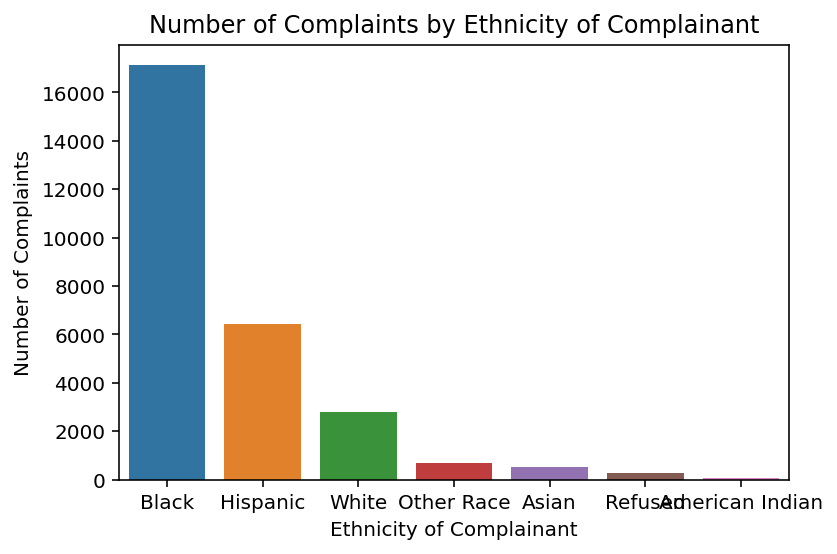

In [415]:
# plotting the number of complaints based on complainant_ethnicity

temp = complaints['complainant_ethnicity'].value_counts()
sns.barplot(x = temp.index , y = temp.values)
plt.title('Number of Complaints by Ethnicity of Complainant')
plt.xlabel('Ethnicity of Complainant')
plt.ylabel('Number of Complaints')
plt.show()

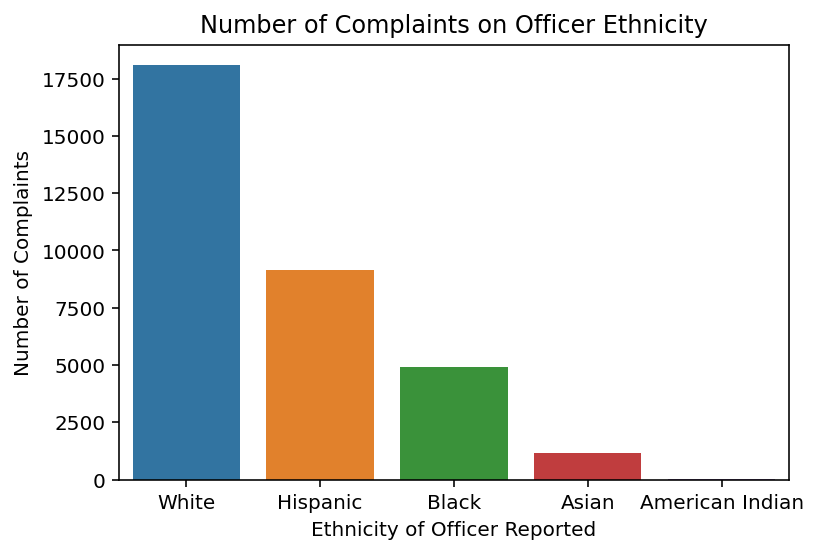

In [416]:
# plotting the number of complaints on the officers ethnicity that the complaints are based on

temp = complaints['mos_ethnicity'].value_counts()
sns.barplot(x = temp.index , y = temp.values)
plt.title('Number of Complaints on Officer Ethnicity')
plt.xlabel('Ethnicity of Officer Reported')
plt.ylabel('Number of Complaints')
plt.show()

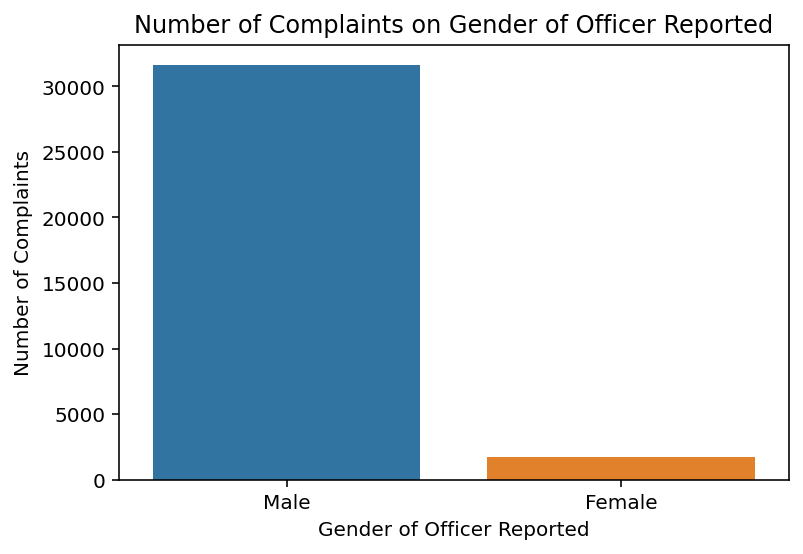

Male      31598
Female     1760
Name: mos_gender, dtype: int64

In [417]:
# plotting the number of complaints on gender of the officer reported

temp = complaints['mos_gender'].value_counts()
sns.barplot(x = temp.index , y = temp.values)
plt.title('Number of Complaints on Gender of Officer Reported')
plt.xlabel('Gender of Officer Reported')
plt.ylabel('Number of Complaints')
plt.show()
temp

##### Bivariate EDA

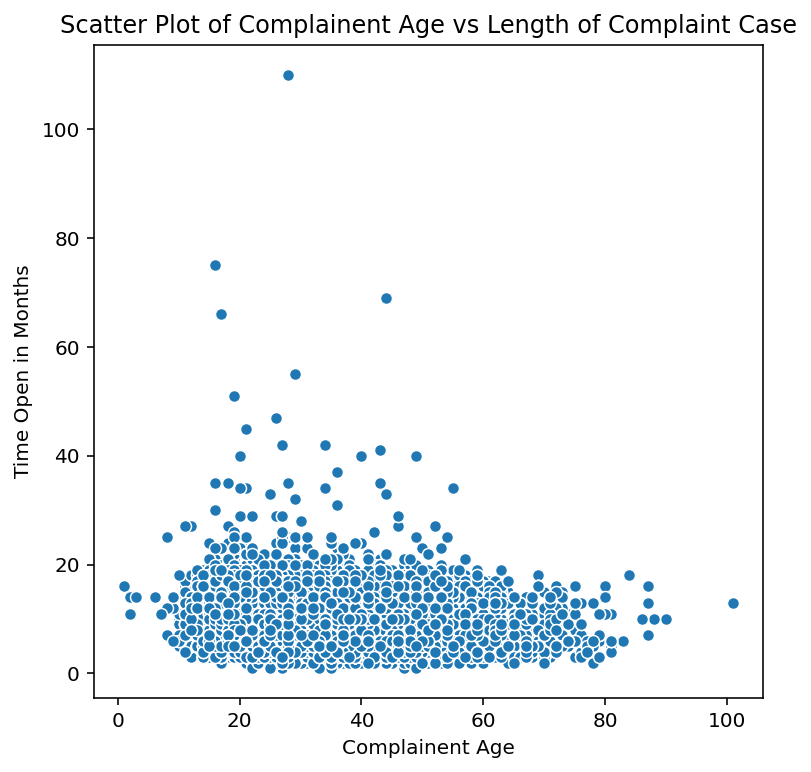

In [418]:
# Complainent Age vs Time in Months scatterplot

temp = complaints.copy()
#temp = temp.drop(index = 10274)
plt.figure(figsize = (6,6))
ax = sns.scatterplot(x ='complainant_age_incident' , y = 'time_open (in months)', data = temp )
plt.title('Scatter Plot of Complainent Age vs Length of Complaint Case')
plt.xlabel('Complainent Age')
plt.ylabel('Time Open in Months')
plt.show();

<Figure size 432x432 with 0 Axes>

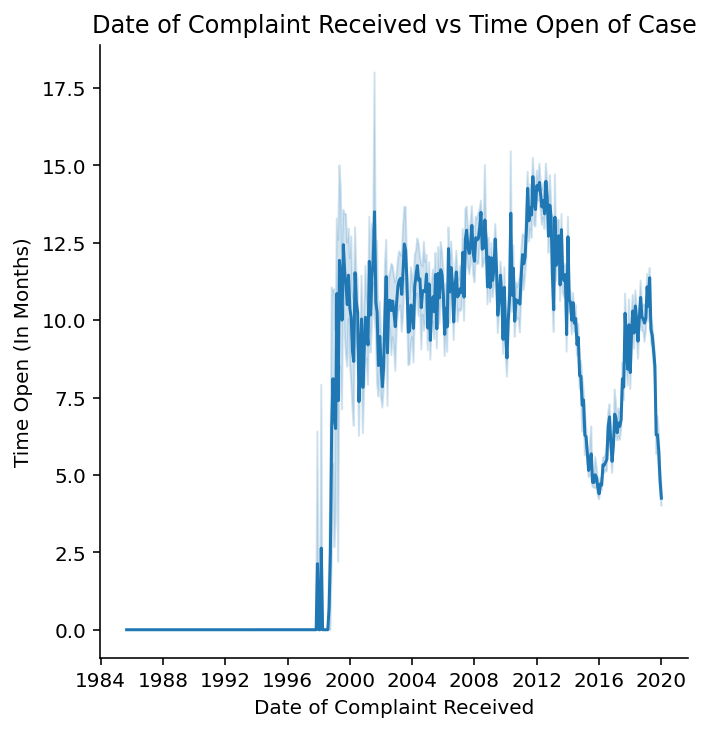

In [419]:
# Distribution Officer Age vs Complainent Age

temp = complaints.copy()
#temp = temp.drop(index = 10274)
plt.figure(figsize = (6,6))
sns.relplot(x ='date_received' , y = 'time_open (in months)', data = temp, kind = 'line' )
plt.title('Date of Complaint Received vs Time Open of Case')
plt.xlabel('Date of Complaint Received')
plt.ylabel('Time Open (In Months)')
plt.show();

complainant_ethnicity,American Indian,Asian,Black,Hispanic,Other Race,Refused,White
mos_ethnicity,,,,,,,
American Indian,0.0,0.0,18.0,2.0,6.0,0.0,2.0
Asian,2.0,61.0,558.0,236.0,19.0,18.0,129.0
Black,4.0,58.0,2846.0,709.0,98.0,38.0,380.0
Hispanic,8.0,96.0,4722.0,2215.0,187.0,58.0,625.0
White,50.0,317.0,8970.0,3262.0,367.0,145.0,1647.0


<Figure size 1440x1440 with 0 Axes>

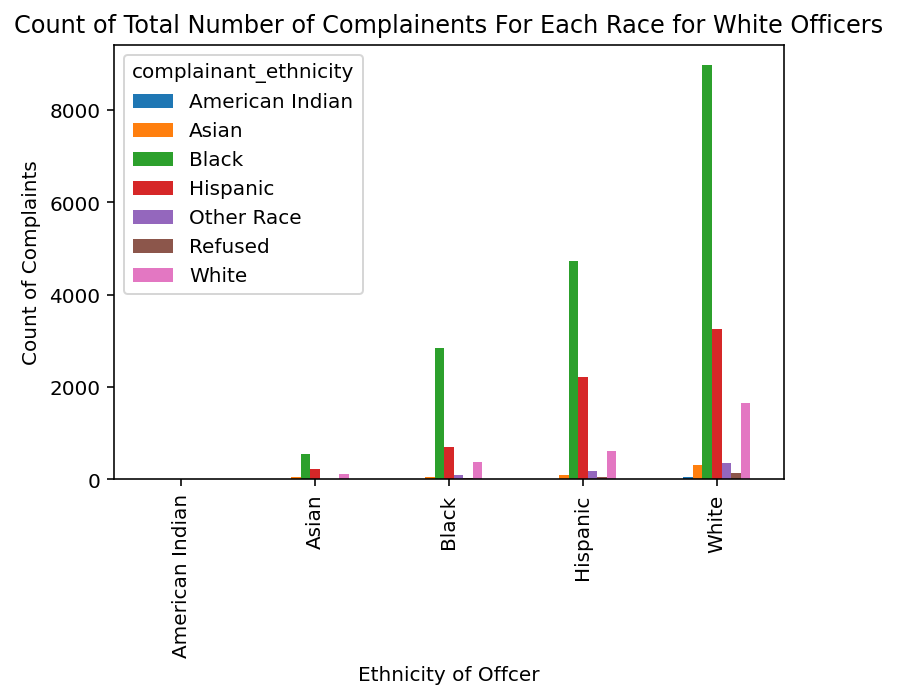

In [420]:
#Comparing the ethnicities of officers vs ethncities of the complaintants

pivot = complaints.pivot_table(index = 'mos_ethnicity', columns ='complainant_ethnicity' ,
                       aggfunc = 'count', values = 'mos_gender').fillna(0)
display(pivot)
plt.figure(figsize = (20,20))
pivot.plot(kind = 'bar')
plt.title('Count of Total Number of Complainents For Each Race for White Officers')
plt.xlabel('Ethnicity of Offcer')
plt.ylabel('Count of Complaints')
plt.show;

##### Aggregate EDA

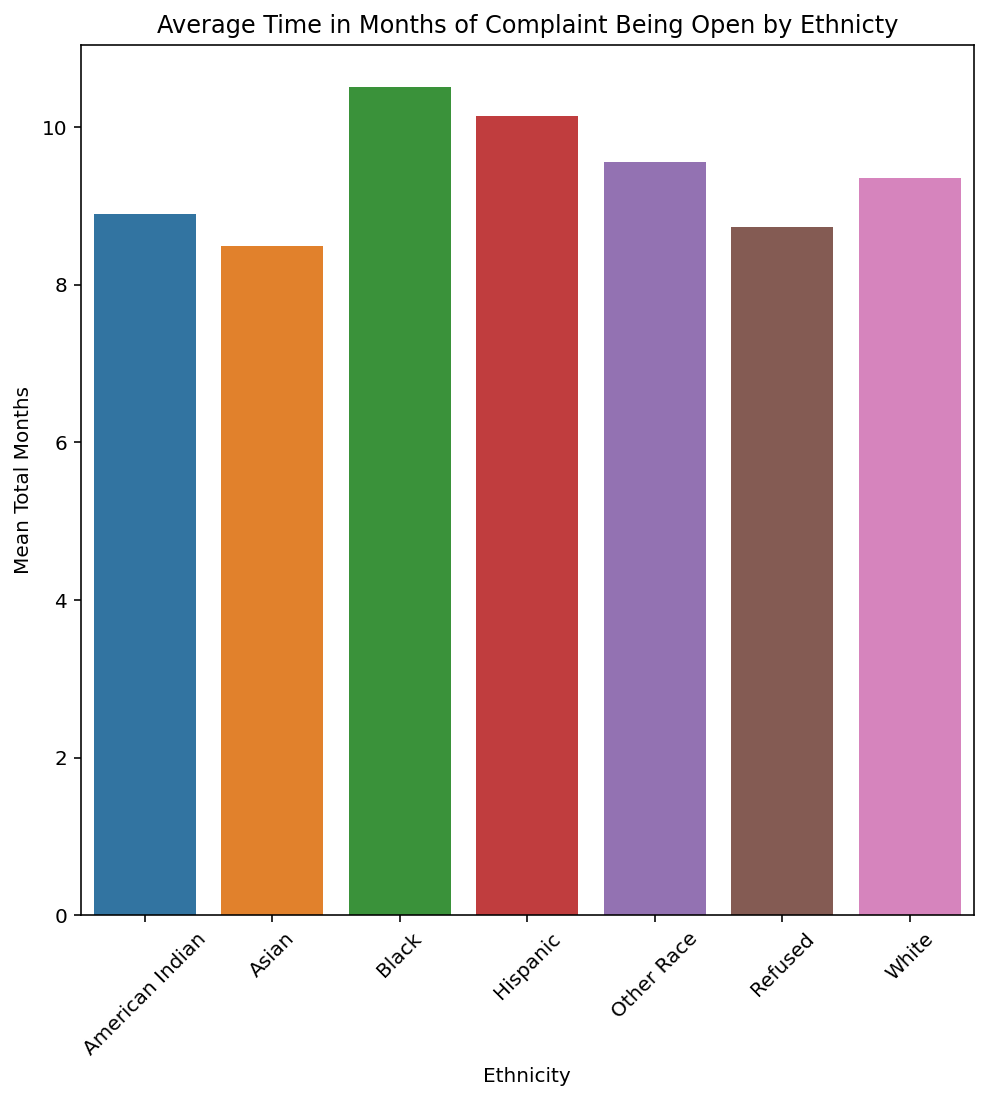

In [421]:
#Average Time open by Ethncity

ethnicity_grouped = complaints.groupby('complainant_ethnicity')['time_open (in months)'].mean()
plt.figure(figsize=(8,8))
ax = sns.barplot(x = ethnicity_grouped.index , y = ethnicity_grouped.values)
plt.title('Average Time in Months of Complaint Being Open by Ethnicty')
plt.ylabel('Mean Total Months')
plt.xlabel('Ethnicity')
plt.xticks(rotation = 45)
plt.show();

In [422]:
#puts each complainants age in a age bucket

def age_bucket(x):
    if x <= 10:
        return '0-10'
    elif x>10 and x<=20:
        return '10-20'
    elif x>20 and x<=30:
        return '20-30'
    elif x>30 and x<=40:
        return '30-40'
    elif x>40 and x<=50:
        return '40-50'
    elif x>50 and x<=60:
        return '50-60'
    elif x>60 and x<=70:
        return '60-70'
    elif x>70 and x<=80:
        return '70-80'
    elif x>80 and x<=90:
        return '80-90'
    elif x>90 and x<=100:
        return '90-100'
    elif x>100:
        return '100+'

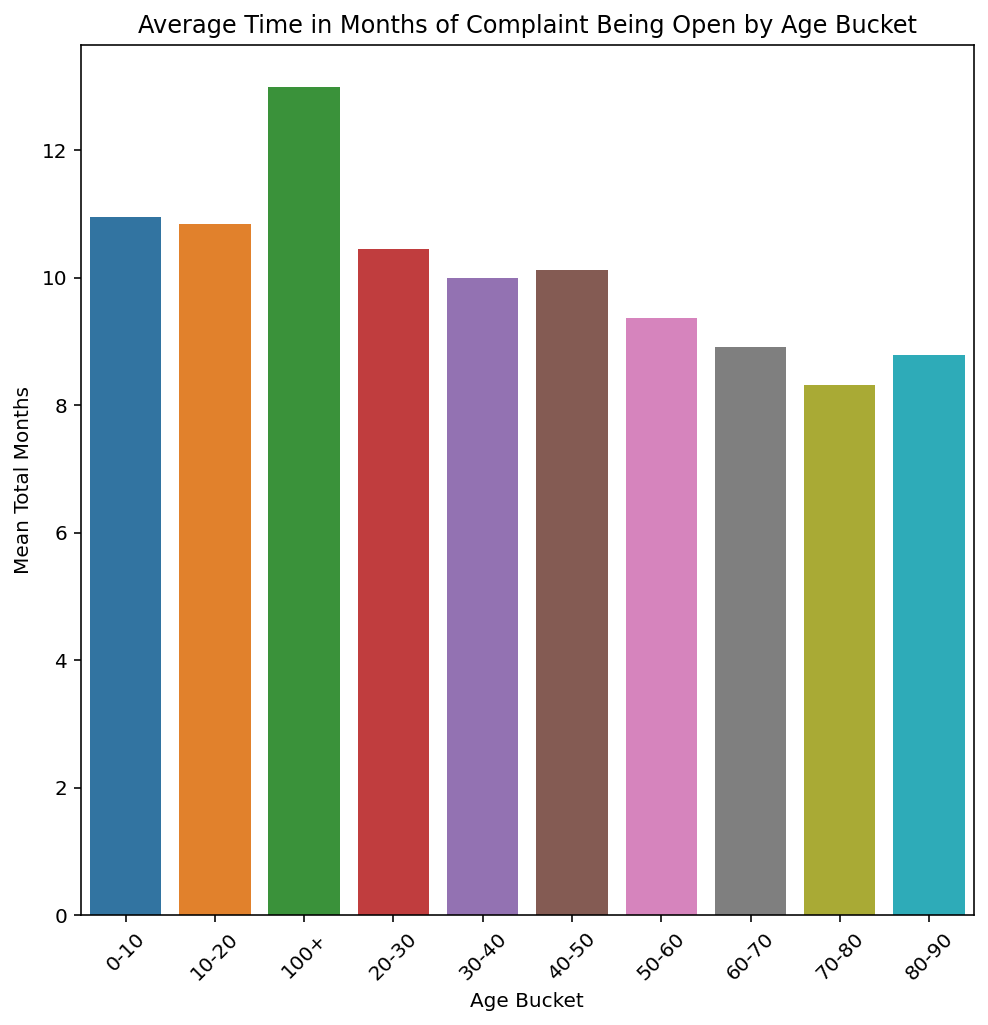

In [423]:
#Average Time open by Age

ages = complaints.copy()
ages['age_bucket'] = ages['complainant_age_incident'].apply(age_bucket)
age_grouped = ages.groupby('age_bucket')['time_open (in months)'].mean()
plt.figure(figsize=(8,8))
ax = sns.barplot(x = age_grouped.index , y = age_grouped.values)
plt.title('Average Time in Months of Complaint Being Open by Age Bucket')
plt.ylabel('Mean Total Months')
plt.xlabel('Age Bucket')
plt.xticks(rotation = 45)
plt.show();

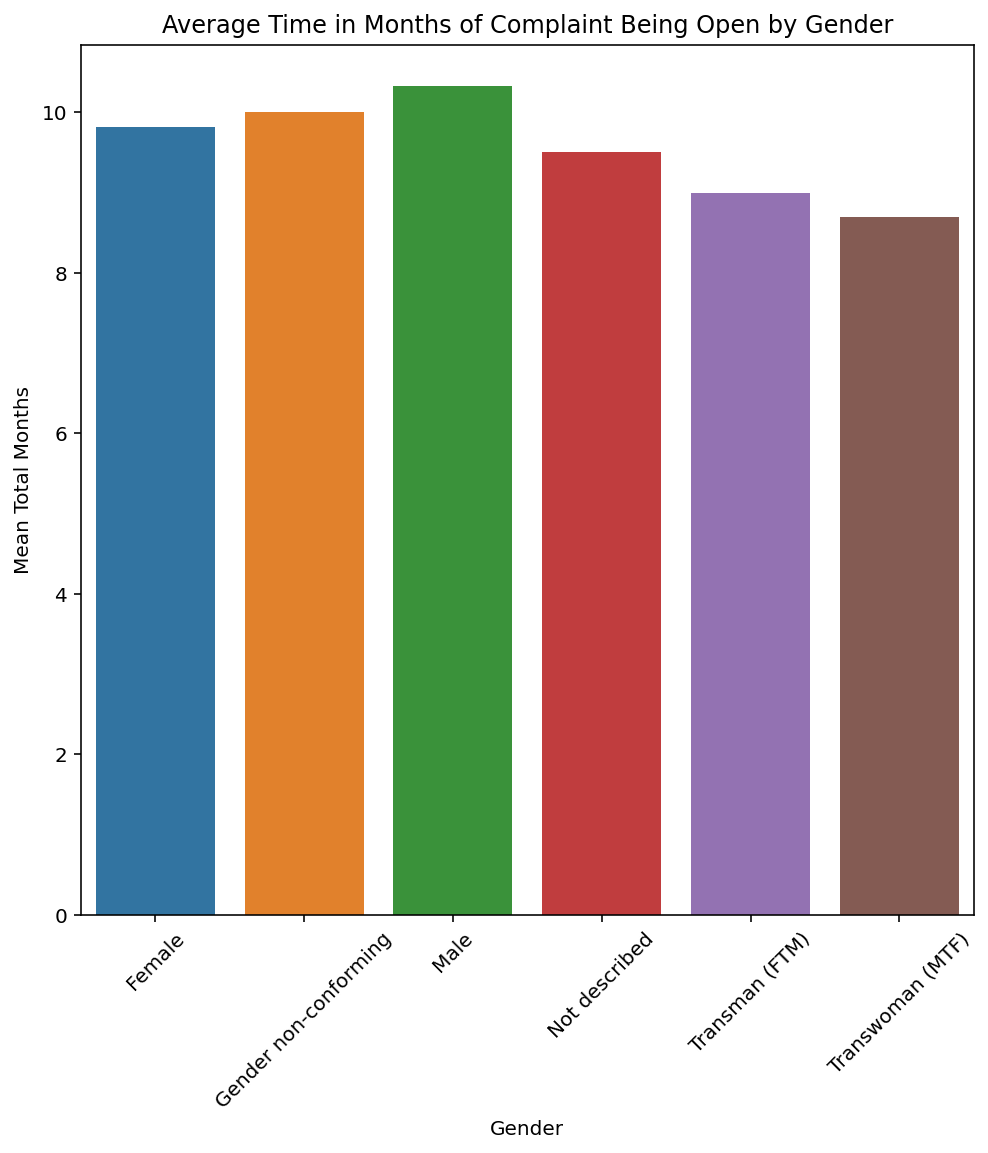

In [424]:
#Average Time open by Gender

gender_grouped = complaints.groupby('complainant_gender')['time_open (in months)'].mean()
plt.figure(figsize=(8,8))
ax = sns.barplot(x = gender_grouped.index , y = gender_grouped.values)
plt.title('Average Time in Months of Complaint Being Open by Gender')
plt.ylabel('Mean Total Months')
plt.xlabel('Gender')
plt.xticks(rotation = 45)
plt.show();

### Assessment of Missingness

We are interested in classifying the missingness of each of the missing columns relevant to our question as dependent on the other columns. Upon looking at the missingness of the original data, we found that whenever complainant_ethnicity was missing, complainant_gender and complainant_age_incident were also missing most of the time. Therefore, we chose complainant_ethnicity as our base column to test dependency. We tested the dependency of this column on other as follows:

*Question*: Is the column of complainant_ethnicity MAR dependent on the categorical columns being tested?

*Test*: Permutation test using total variation distance of the categorically pivoted table by the column that is being passed based on null values of complainant_ethnicity.

*Null Hypothesis*: The missingness of complainant_ethnicity is not dependent on the categorical column that is being tested.

*Alternative Hypothesis*: The missingness of complainant_ethnicity is to some extent dependent on that of the categorical column that is being tested.

*Level of Significance*: 0.01

In [425]:
# Checking the columns with missing values to see how to move forward with the missingness analysis
complaints.isna().mean()

unique_mos_id               0.000000
complaint_id                0.000000
mos_ethnicity               0.000000
mos_gender                  0.000000
mos_age_incident            0.000000
complainant_ethnicity       0.165028
complainant_gender          0.125757
complainant_age_incident    0.144493
fado_type                   0.000000
allegation                  0.000030
precinct                    0.000719
board_disposition           0.000000
date_received               0.000000
date_closed                 0.000000
time_open (in months)       0.000000
dtype: float64

In [458]:
# This function is a helper for the perm_missing function. It creates a pivot_table based on the null values of
# complainant_ethnicity, which we found to be one of the columns that is non-trivially missing, and the values of the
# categorical column that is passed to the permutation test and calculates the tvd from the pivot table.

def tvd_calc(df, col):
    result = df.pivot_table(index = col, columns = pd.isnull(df['complainant_ethnicity']), aggfunc = 'size')
    #print(result)
    return result.fillna(0).apply(lambda x : x / x.sum(), axis = 0).diff(axis = 1)[True].abs().sum() / 2

In [459]:
# This is the function that runs the permutation test for missingness to see if complainant_ethnicity is MAR dependent
# on any other categorical column. To do so it uses the tvd test-statistic from the cell above. It returns the array of
# tvds, the observed tvd of the original dataset, and the p-value of the test.

def perm_missing(col, N):
    temp = complaints[['complainant_ethnicity', col]]
    obs = tvd_calc(temp, col)
    tvds = []
    
    for x in range(N):
        shuffled_temp = temp[col].sample(replace=False, frac=1).reset_index(drop=True)
        new_temp = temp.assign(**{col: shuffled_temp})
        tvds.append(tvd_calc(new_temp, col))
    
    p_val = np.count_nonzero(np.array(tvds) >= obs) / N
    
    return tvds, obs, p_val
    

In [460]:
# This function is a simple graphing function for the permutation test. It creates a histogram with the returned tvds
# and plots the observed tvd.

def graph_missing(tvds, obs, pval, col):
    pd.Series(tvds).plot(kind='hist', title = 'Permutation Missingness Test: Dependence of complainant_ethnicity on ' + col)
    plt.scatter(obs, 0, color='r', s=50)
    print('p-value: '+ str(pval))
    print('obs: ' + str(obs))

p-value: 0.0
obs: 0.17811360862572032


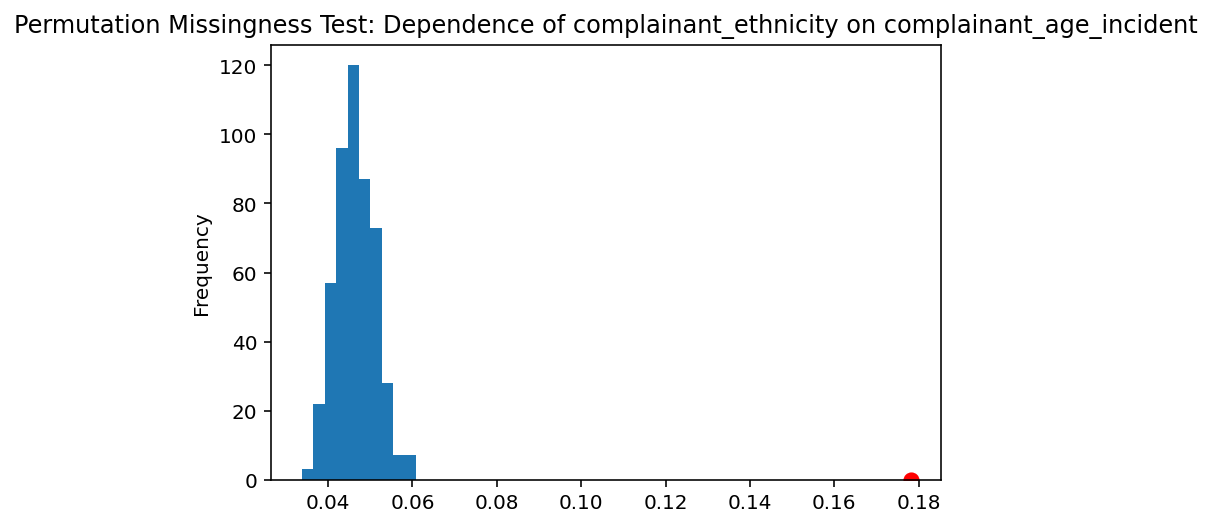

In [461]:
# Missingness test to see if complainant_ethnicity is dependent on the complainant_age_incident.

tvds, obs, p_val = perm_missing('complainant_age_incident', 500)
graph_missing(tvds, obs, p_val, 'complainant_age_incident')

p-value: 0.0
obs: 0.031370019326452586


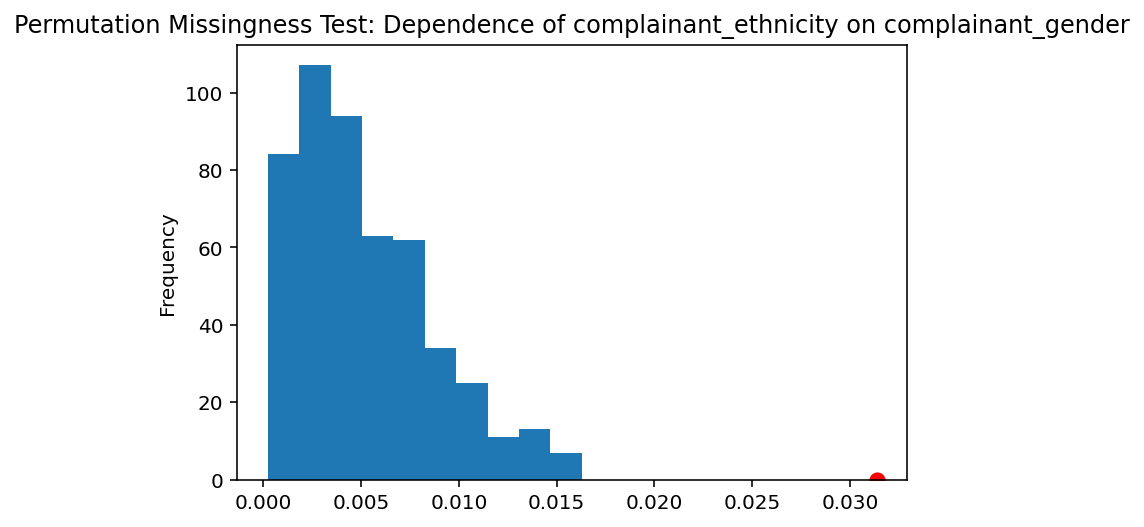

In [462]:
# Missingness test to see if complainant_ethnicity is dependent on the complainant_gender.

tvds, obs, p_val = perm_missing('complainant_gender', 500)
graph_missing(tvds, obs, p_val, 'complainant_gender')

p_val: 1.0
obs: 0.30243973543078584


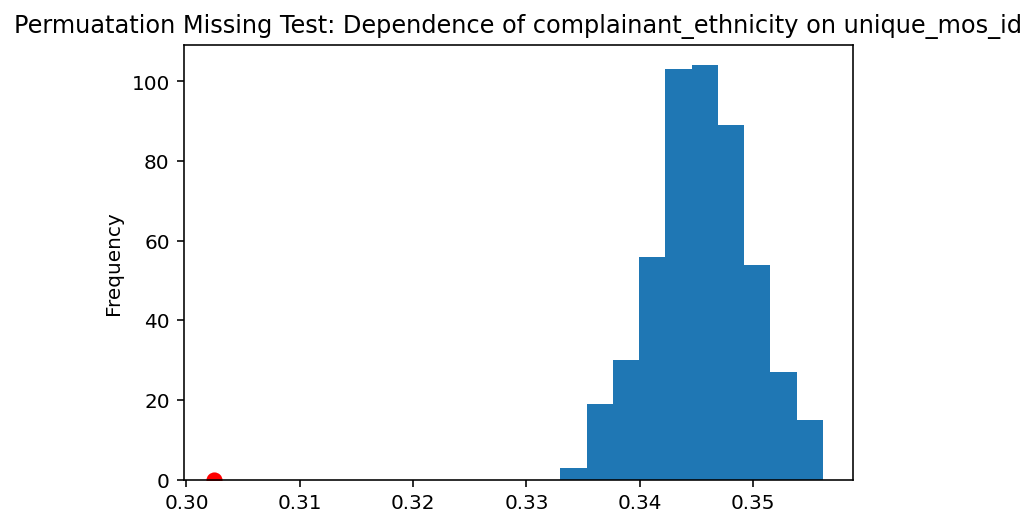

In [465]:
# Missingness test to see if complainant_ethnicity is dependent on the board_disposition.

temp = complaints[['unique_mos_id', 'complainant_ethnicity']].assign(**{'is_null': complaints['complainant_ethnicity'].isnull()})
pivot = temp.pivot_table(index = 'is_null', columns = 'unique_mos_id', aggfunc = 'size')
observed = pivot.apply(lambda x: x/x.sum(), axis = 1).diff().iloc[-1].abs().sum()/float(2)

list1 = []
for i in range(500):
    shuffled = complaints['unique_mos_id'].sample(replace=False, frac=1).reset_index(drop=True)
    temp1 = complaints[['unique_mos_id', 'complainant_ethnicity']].assign(**{'SHUFFLED':  shuffled,'is_null': complaints['complainant_ethnicity'].isnull()})
    pivot1 = temp1.pivot_table(index = 'is_null', columns = 'SHUFFLED', aggfunc = 'size').fillna(0)
    value = pivot1.apply(lambda x: x/x.sum(), axis = 1).diff().iloc[-1].abs().sum()/float(2)
    list1.append(value)
    
p_val = np.count_nonzero(list1 >= observed)/float(500)

pd.Series(list1).plot(kind='hist', title = 'Permuatation Missing Test: Dependence of complainant_ethnicity on unique_mos_id')
plt.scatter(observed, 0, color='r', s=50)
print('p_val: ' + str(p_val))
print('obs: ' + str(observed))

### Hypothesis Test

We were interested in finding the connection between ethnicity and policing in the state of New York so for our Hypothesis test, we decided to focus on the average length of each complaint from opening to close and seeing if there was any differences by ethnicity. We are going to be running a hypothesis test for each ethnicity and comparing it to the white mean (which we determined is a goood indication of the basis for NYPD complaint time).

*Question*: Does the length that the complaint is open depend on ethnicity?

*Test*: Hypothesis test using absolute difference between the mean of white ethnicity vs the given ethnicity's mean of total complaint time (from open to close). 

*Null Hypothesis*: The mean total length of complaints (from open to close) is the same for white ethnicities vs the other ethnicities we are testing. 

*Alternative Hypothesis*: The mean total length of complaints (from open to close) is the less for white ethnicities vs the other ethnicities we are testing.

*Level of Significance*: 0.05

In [432]:
#helper functions for running tests
#Return test satistic of our test for the given test ethnicity

def test_statistic(complaints, test_ethnicity, col):
    grouped = complaints.groupby('complainant_ethnicity')[col].mean()
    return abs(grouped['White'] - grouped[test_ethnicity])

def perm_test(complaints, test_ethnicity):
    complaints_loced = complaints.loc[(complaints['complainant_ethnicity'] == 'White') | (complaints['complainant_ethnicity'] == test_ethnicity)]
    observed = test_statistic(complaints_loced, test_ethnicity, 'time_open (in months)')
    shuffled_stats = []
    
    for i in range(1000):
        shuffled = complaints_loced['time_open (in months)'].sample(frac=1, replace=False).reset_index(drop=True)
        with_shuffled = complaints_loced[['complainant_ethnicity']].assign(shuffled = shuffled)
        shuffled_stat = test_statistic(with_shuffled, test_ethnicity, 'shuffled')
        shuffled_stats.append(shuffled_stat)
        
    p_value = np.count_nonzero(shuffled_stats > observed)/float(1000)
    return p_value, shuffled_stats, observed

Question: Does black ethnicity have a difference on the length of time the complaint is open?

p-value: 0.0
obs: 1.155333150724669


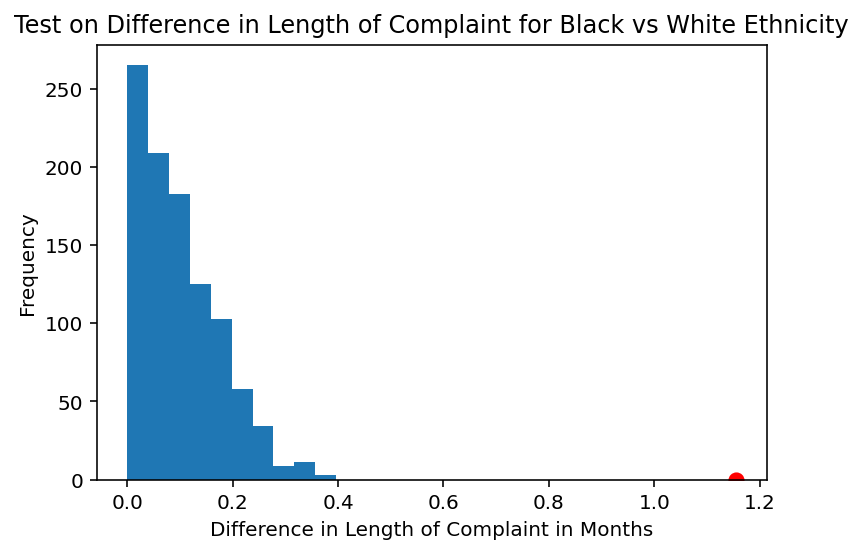

In [433]:
# Hypothesis test for time open for Black Ethnicity

p, stats, obs = perm_test(complaints, 'Black')
pd.Series(stats).plot(kind='hist', title = 'Test on Difference in Length of Complaint for Black vs White Ethnicity')
plt.scatter(obs, 0, color='r', s=50)
plt.xlabel('Difference in Length of Complaint in Months')
print('p-value: '+ str(p))
print('obs: ' + str(obs))

Does Hispanic ethnicity have a difference on the length of time the complaint is open?

p-value: 0.0
obs: 0.7905341382857767


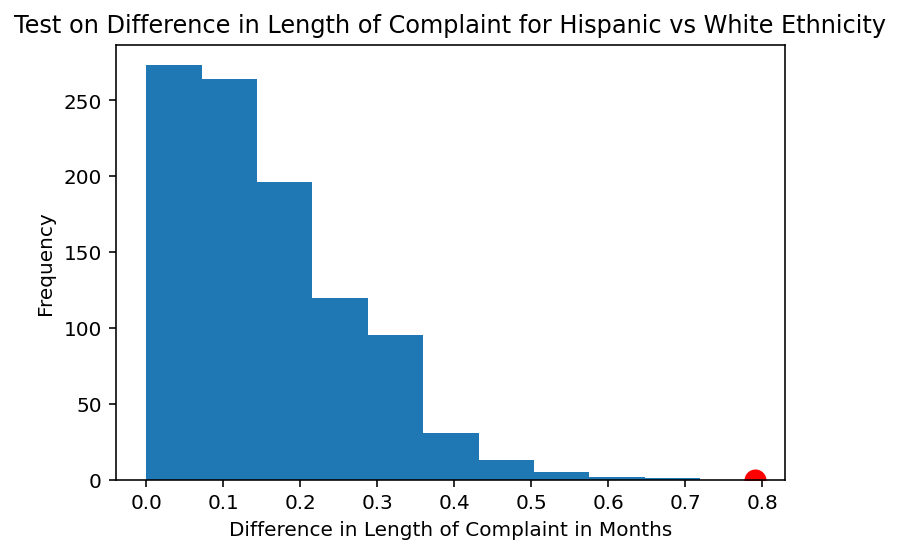

In [434]:
# Hypothesis test for time open for Hispanic Ethnicity

p, stats, obs = perm_test(complaints, 'Hispanic')
pd.Series(stats).plot(kind='hist', title = 'Test on Difference in Length of Complaint for Hispanic vs White Ethnicity')
plt.scatter(obs, 0, color='r', s=100)
plt.xlabel('Difference in Length of Complaint in Months')
print('p-value: '+ str(p))
print('obs: ' + str(obs))

Does American Indian ethnicity have a difference on the length of time the complaint is open?

p-value: 0.68
obs: 0.4534337944664024


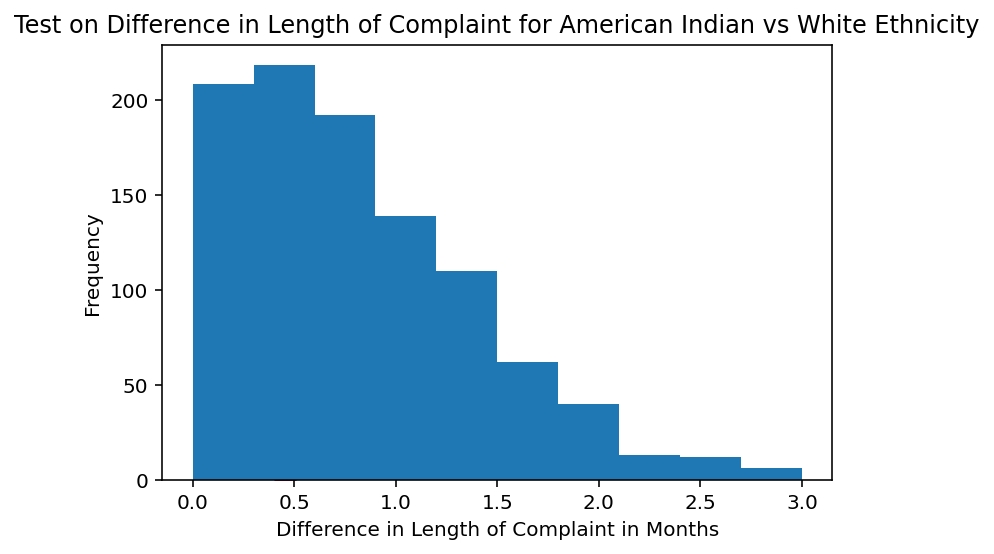

In [435]:
# Hypothesis test for time open for American Indian ethnicity

p, stats, obs = perm_test(complaints, 'American Indian')
pd.Series(stats).plot(kind='hist', title = 'Test on Difference in Length of Complaint for American Indian vs White Ethnicity')
plt.scatter(obs, 0, color='r', s=100)
plt.xlabel('Difference in Length of Complaint in Months')
print('p-value: '+ str(p))
print('obs: ' + str(obs))

Does Asian ethnicity have a difference on the length of time the complaint is open?

p-value: 0.097
obs: 0.8709619899551235


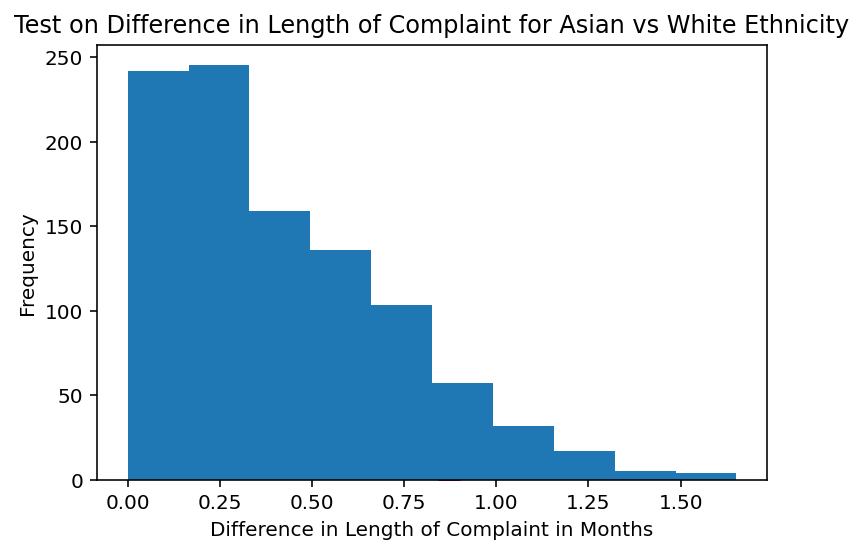

In [436]:
# Hypothesis test for time open for Asian ethnicity

p, stats, obs = perm_test(complaints, 'Asian')
pd.Series(stats).plot(kind='hist', title = 'Test on Difference in Length of Complaint for Asian vs White Ethnicity')
plt.scatter(obs, 0, color='r', s=100)
plt.xlabel('Difference in Length of Complaint in Months')
print('p-value: '+ str(p))
print('obs: ' + str(obs))

Does Other ethnicity have a difference on the length of time the complaint is open?

p-value: 0.681
obs: 0.20604737244644866


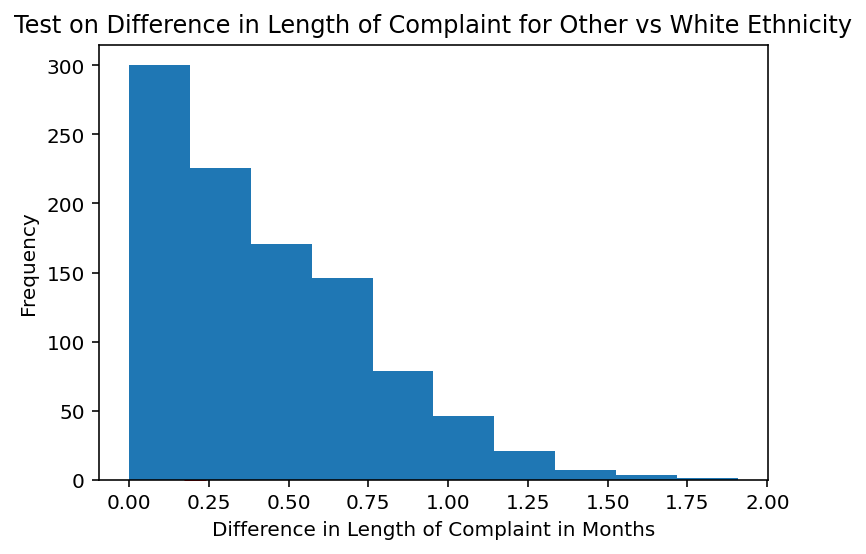

In [437]:
# Hypothesis test for time open for Other ethnicity

p, stats, obs = perm_test(complaints, 'Other Race')
pd.Series(stats).plot(kind='hist', title = 'Test on Difference in Length of Complaint for Other vs White Ethnicity')
plt.scatter(obs, 0, color='r', s=100)
plt.xlabel('Difference in Length of Complaint in Months')
print('p-value: '+ str(p))
print('obs: ' + str(obs))